In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


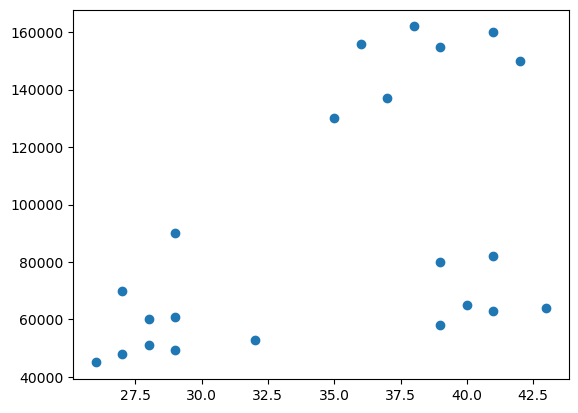

In [63]:
plt.scatter(df['Age'],df['Income($)'])

In [64]:
from sklearn.cluster import KMeans

In [65]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [66]:
Y_predicted = km.fit_predict(df[['Age','Income($)']])
Y_predicted

C:\Users\manoj\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manoj\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [67]:
df['cluster'] = Y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


Text(0, 0.5, 'Income($)')

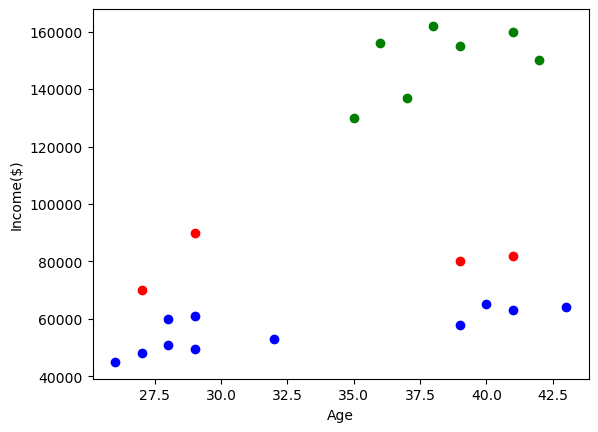

In [68]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.scatter(df0['Age'], df0['Income($)'], c='r')
plt.scatter(df1['Age'], df1['Income($)'], c='g')
plt.scatter(df2['Age'], df2['Income($)'], c='b')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler = MinMaxScaler()

In [73]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [74]:
df.drop(['cluster'], axis=1, inplace=True)
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [75]:
Y_predicted = km.fit_predict(df[['Age','Income($)']])
Y_predicted

C:\Users\manoj\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manoj\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [76]:
df['custer'] = Y_predicted
df.head()

,Name,Age,Income($),custer
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [80]:
centers = km.cluster_centers_
centers

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

Text(0, 0.5, 'Income($)')

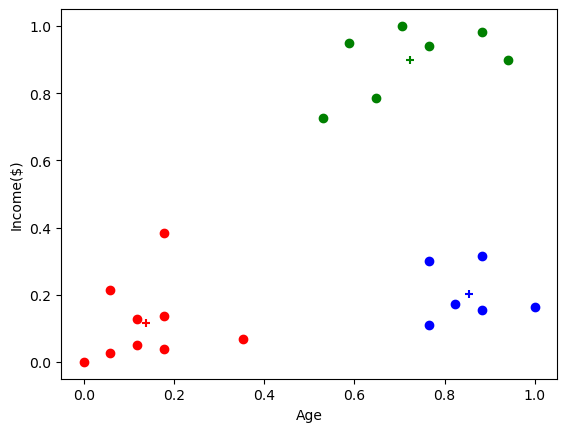

In [85]:
df0 = df[df.custer==0]
df1 = df[df.custer==1]
df2 = df[df.custer==2]
plt.scatter(df0['Age'], df0['Income($)'], c='r')
plt.scatter(centers[0][0], centers[0][1], c='r', marker='+')
plt.scatter(df1['Age'], df1['Income($)'], c='g')
plt.scatter(centers[1][0], centers[1][1], c='g', marker='+')
plt.scatter(df2['Age'], df2['Income($)'], c='b')
plt.scatter(centers[2][0], centers[2][1], c='b', marker='+')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [86]:
sse = []
for k in range(1, 10):
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
sse

C:\Users\manoj\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manoj\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\manoj\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manoj\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a mem

[5.434011511988176,
 2.091136388699076,
 0.4750783498553094,
 0.34910470944195643,
 0.2621792762345213,
 0.21552563314755374,
 0.16869711728567788,
 0.1327661931978319,
 0.10188787724979426]

Text(0, 0.5, 'Sum of Squared Error')

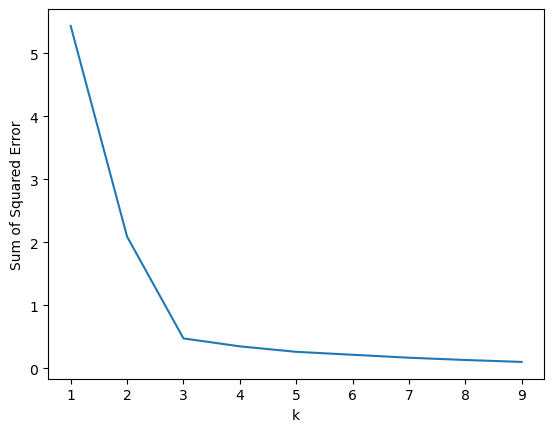

In [89]:
plt.plot(range(1, 10), sse)
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')